In [1]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Cargar el dataset desde el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar datos de entrenamiento
ruta_archivo_pickle_train = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dataHojas_1.pkl'
dataset_train = cargar_pickle(ruta_archivo_pickle_train)

# Crear listas para almacenar todas las imágenes y etiquetas de entrenamiento
train_images = []
train_labels = []

for imagen_array, etiqueta in dataset_train:
    train_images.append(imagen_array)
    train_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Verificar las dimensiones
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)

Dimensiones de train_images: (250, 800, 900, 3)
Dimensiones de train_labels: (250,)


In [4]:
import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Cargar datos de prueba
ruta_archivo_pickle_test = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/pruebas.pkl'
dataset_test = cargar_pickle(ruta_archivo_pickle_test)

# Crear listas para almacenar todas las imágenes y etiquetas de prueba
test_images = []
test_labels = []

for imagen_array, etiqueta in dataset_test:
    test_images.append(imagen_array)
    test_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Verificar las dimensiones
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de test_images: (200, 800, 900, 3)
Dimensiones de test_labels: (200,)


In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([50, 50, 50, 50, 50]))

In [5]:
# Dataset personalizado para entrenamiento y prueba
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X / 255., dtype=torch.float32).permute(0, 3, 1, 2)  # Normalización y ajuste de tamaño
        self.Y = torch.tensor(Y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [6]:
# Crear Datasets y DataLoaders
train_dataset = CustomDataset(train_images, train_labels)
test_dataset = CustomDataset(test_images, test_labels)

In [ ]:
print(len(train_dataset))  # Verificar que el tamaño del dataset es el esperado

250


In [ ]:
print(len(test_dataset))  # Verificar que el tamaño del dataset es el esperado

200


In [ ]:
# Iterando sobre el train_dataloader
print("Primeros cinco elementos del train_dataloader:")
for i, data in enumerate(train_dataset):
    if i < 1:
        print(data)
    else:
        break

Primeros cinco elementos del train_dataloader:
(tensor([[[0.7412, 0.7451, 0.7490,  ..., 0.6706, 0.6667, 0.6667],
         [0.7373, 0.7412, 0.7451,  ..., 0.6706, 0.6667, 0.6667],
         [0.7294, 0.7373, 0.7412,  ..., 0.6706, 0.6667, 0.6627],
         ...,
         [0.7373, 0.7451, 0.7529,  ..., 0.6745, 0.6706, 0.6667],
         [0.7373, 0.7451, 0.7490,  ..., 0.6784, 0.6745, 0.6706],
         [0.7294, 0.7373, 0.7412,  ..., 0.6784, 0.6745, 0.6745]],

        [[0.7333, 0.7373, 0.7412,  ..., 0.6627, 0.6588, 0.6588],
         [0.7294, 0.7333, 0.7373,  ..., 0.6627, 0.6588, 0.6588],
         [0.7216, 0.7294, 0.7333,  ..., 0.6627, 0.6588, 0.6549],
         ...,
         [0.7294, 0.7373, 0.7451,  ..., 0.6667, 0.6627, 0.6588],
         [0.7294, 0.7373, 0.7412,  ..., 0.6706, 0.6667, 0.6627],
         [0.7216, 0.7294, 0.7333,  ..., 0.6706, 0.6667, 0.6667]],

        [[0.7373, 0.7412, 0.7451,  ..., 0.6667, 0.6627, 0.6627],
         [0.7333, 0.7373, 0.7412,  ..., 0.6667, 0.6627, 0.6627],
         [

In [7]:
# Crear el Dataset para el subconjunto
dataset = {
    'train': train_dataset,
    'val': test_dataset  # Usaremos el conjunto de prueba como validación
}

# Crear el DataLoader para el subconjunto
dataloader = {
    'train': DataLoader(dataset['train'], batch_size=4, shuffle=True),
    'val': DataLoader(dataset['val'], batch_size=4, shuffle=False)
}

In [8]:
import torchvision
import torch # import the torch module

In [9]:
import torchvision

class DenseNetCustom(torch.nn.Module):
    def __init__(self, n_outputs=5, pretrained=False, freeze=False):
        super().__init__()
        # Cargar DenseNet121 preentrenado
        densenet = torchvision.models.densenet121(pretrained=pretrained)
        # Eliminar la última capa de clasificación
        self.features = densenet.features
        self.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = torch.nn.Linear(densenet.classifier.in_features, n_outputs)

        # Congelar capas si es necesario
        if freeze:
            for param in self.features.parameters():
                param.requires_grad = False

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def unfreeze(self):
        for param in self.features.parameters():
            param.requires_grad = True

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
from sklearn.metrics import accuracy_score
import torch

In [12]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

In [13]:
import gc

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=1000, log_each=1, weight_decay=0, early_stopping=100, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNet.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNet.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
import os

In [ ]:

modelo_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNet.pt'

# Verificar si el archivo existe y no está vacío
if os.path.exists(modelo_path) and os.path.getsize(modelo_path) > 0:
    model_c = DenseNetCustom(pretrained=False).cuda()
    model_c.load_state_dict(torch.load(modelo_path))
    print(f"Modelo cargado desde {modelo_path}")
    optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
    hist = fit(model_c, dataloader, optimizer, epochs=1000, verbose=0)
else:
    print(f"No se encontró el archivo {modelo_path} o está vacío. Se comenzará a entrenar un modelo nuevo.")
    model_c = DenseNetCustom(pretrained=False).cuda()
    optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
    hist = fit(model_c, dataloader, optimizer, epochs=1000, verbose=0)


No se encontró el archivo /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNet.pt o está vacío. Se comenzará a entrenar un modelo nuevo.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/1000 - Train Loss: 1.05168, Train Acc: 0.61905, Val Loss: 0.37515, Val Acc: 0.86000
Epoch 2/1000 - Train Loss: 0.77810, Train Acc: 0.73413, Val Loss: 0.87161, Val Acc: 0.69500
Epoch 3/1000 - Train Loss: 0.67456, Train Acc: 0.75794, Val Loss: 0.70298, Val Acc: 0.78000
Epoch 4/1000 - Train Loss: 0.55814, Train Acc: 0.80952, Val Loss: 2.49395, Val Acc: 0.73000
Epoch 5/1000 - Train Loss: 0.64703, Train Acc: 0.74206, Val Loss: 1.01862, Val Acc: 0.77000
Epoch 6/1000 - Train Loss: 0.64895, Train Acc: 0.75794, Val Loss: 1.14091, Val Acc: 0.80000
Epoch 7/1000 - Train Loss: 0.47853, Train Acc: 0.83333, Val Loss: 0.52008, Val Acc: 0.84000
Epoch 8/1000 - Train Loss: 0.44747, Train Acc: 0.83730, Val Loss: 0.43745, Val Acc: 0.85000
Epoch 9/1000 - Train Loss: 0.39370, Train Acc: 0.86905, Val Loss: 0.25552, Val Acc: 0.92000
Epoch 10/1000 - Train Loss: 0.56125, Train Acc: 0.79762, Val Loss: 0.29799, Val Acc: 0.93000
Epoch 11/1000 - Train Loss: 0.38128, Train Acc: 0.86111, Val Loss: 0.63187, Val

# Cargamos los pesos del modelo pre-entrenado

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=1000, log_each=1, weight_decay=0, early_stopping=50, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetConPesos.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetConPesos.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:

modelo_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetConPesos.pt'

# Verificar si el archivo existe y no está vacío
if os.path.exists(modelo_path) and os.path.getsize(modelo_path) > 0:
    model_c = DenseNetCustom(pretrained=True, freeze=True).cuda()
    model_c.load_state_dict(torch.load(modelo_path))
    print(f"Modelo cargado desde {modelo_path}")
    optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
    hist = fit(model_c, dataloader, optimizer, epochs=1000, verbose=0)
else:
    print(f"No se encontró el archivo {modelo_path} o está vacío. Se comenzará a entrenar un modelo nuevo.")
    model_c = DenseNetCustom(pretrained=True, freeze=True).cuda()
    optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
    hist = fit(model_c, dataloader, optimizer, epochs=1000, verbose=0)


No se encontró el archivo /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetConPesos.pt o está vacío. Se comenzará a entrenar un modelo nuevo.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 74.6MB/s]


Epoch 1/1000 - Train Loss: 1.46790, Train Acc: 0.45238, Val Loss: 1.19369, Val Acc: 0.85000
Epoch 2/1000 - Train Loss: 1.17984, Train Acc: 0.78571, Val Loss: 0.91277, Val Acc: 0.90500
Epoch 3/1000 - Train Loss: 1.05753, Train Acc: 0.75397, Val Loss: 0.72488, Val Acc: 0.91000
Epoch 4/1000 - Train Loss: 0.88825, Train Acc: 0.79365, Val Loss: 0.61666, Val Acc: 0.91500
Epoch 5/1000 - Train Loss: 0.78579, Train Acc: 0.85714, Val Loss: 0.51389, Val Acc: 0.93000
Epoch 6/1000 - Train Loss: 0.71022, Train Acc: 0.85317, Val Loss: 0.44821, Val Acc: 0.94000
Epoch 7/1000 - Train Loss: 0.67511, Train Acc: 0.84921, Val Loss: 0.39864, Val Acc: 0.95000
Epoch 8/1000 - Train Loss: 0.64206, Train Acc: 0.85714, Val Loss: 0.35243, Val Acc: 0.95000
Epoch 9/1000 - Train Loss: 0.55712, Train Acc: 0.90476, Val Loss: 0.30771, Val Acc: 0.97500
Epoch 10/1000 - Train Loss: 0.55385, Train Acc: 0.86111, Val Loss: 0.30289, Val Acc: 0.96500
Epoch 11/1000 - Train Loss: 0.56141, Train Acc: 0.86905, Val Loss: 0.28323, Val

<ipython-input-18-6abe6d54fdba>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Ahora probamos el modelo con imagenes de internet.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-7-85682d54eecf>:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

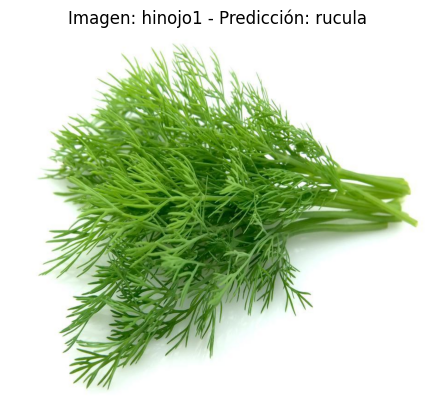

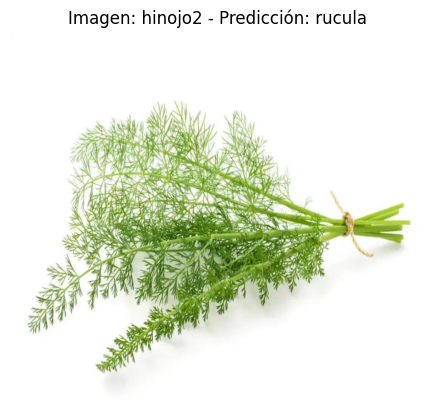

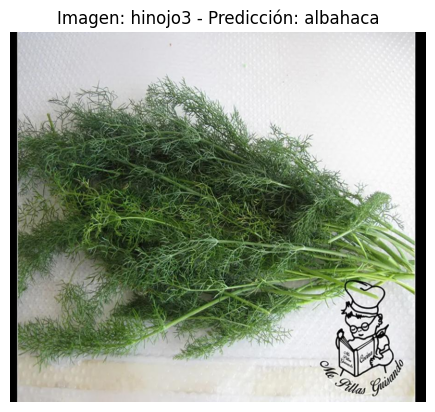

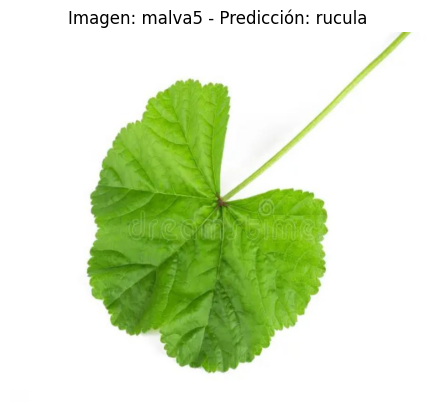

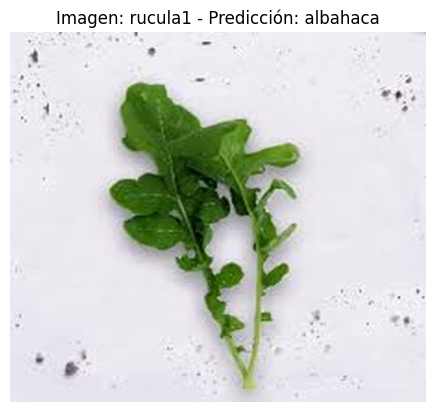

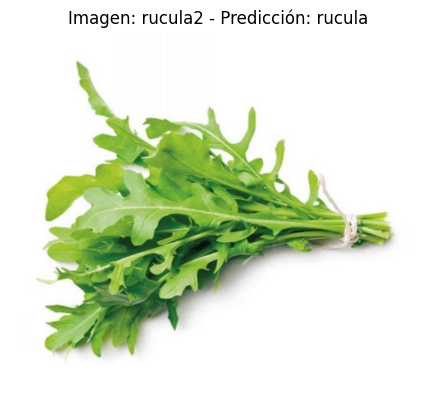

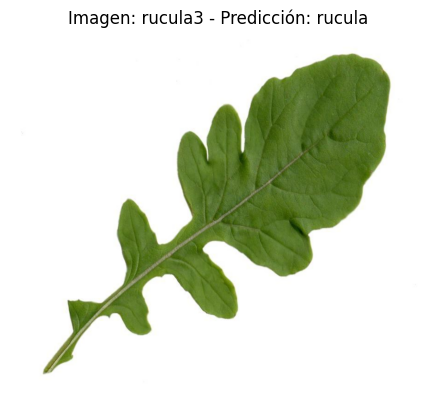

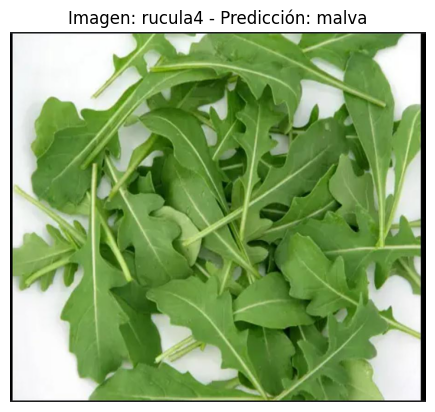

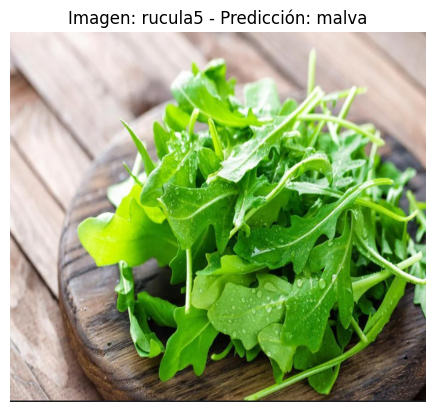

In [7]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Definir las etiquetas correspondientes
etiquetas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Lista de nombres de imágenes
imagenes_nombres = [
    'hinojo1', 'hinojo2', 'hinojo3',
    'malva5',
    'rucula1', 'rucula2', 'rucula3', 'rucula4', 'rucula5'
]

# Ruta base de las imágenes
ruta_base = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim/'

# Inicializar una lista para guardar los pares (imagen_tensor, etiqueta)
pares_imagen_etiqueta = []

# Cargar el modelo DenseNet entrenado
model = DenseNetCustom(pretrained=False, freeze=False)
model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetConPesos.pt'))
model.eval()

# Mover el modelo a la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Definir una función de normalización similar a la usada en el entrenamiento
def normalizar_imagen(imagen_array):
    imagen_normalizada = imagen_array / 255.0  # Normalizar entre 0 y 1
    imagen_tensor = torch.tensor(imagen_normalizada, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
    return imagen_tensor

for nombre_imagen in imagenes_nombres:
    # Crear la ruta completa de la imagen
    imagen_path = ruta_base + nombre_imagen + '.jpg'

    # Cargar la imagen
    imagen = Image.open(imagen_path).convert('RGB')  # Asegurarse de que la imagen está en modo RGB

    # Convertir la imagen a un array de NumPy
    imagen_array = np.array(imagen)

    # Normalizar la imagen y convertirla a un tensor
    imagen_tensor = normalizar_imagen(imagen_array)

    # Realizar la predicción
    with torch.no_grad():
        salida = model(imagen_tensor)
        prediccion = torch.argmax(salida, dim=1).item()

    # Mostrar la imagen
    plt.imshow(imagen_array)
    plt.title(f'Imagen: {nombre_imagen} - Predicción: {etiquetas[prediccion]}')
    plt.axis('off')
    plt.show()

    # Guardar el par (imagen_tensor, prediccion)
    pares_imagen_etiqueta.append((imagen_tensor, prediccion))

# Usamos los pesos y también la red completa

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=1000, log_each=1, weight_decay=0, early_stopping=50, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetRedCompleta.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetRedCompleta.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
import os

In [ ]:
modelo_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetRedCompleta.pt'

# Verificar si el archivo existe y no está vacío
if os.path.exists(modelo_path) and os.path.getsize(modelo_path) > 0:
    model_c = DenseNetCustom(pretrained=True, freeze=False).cuda()
    model_c.load_state_dict(torch.load(modelo_path))
    print(f"Modelo cargado desde {modelo_path}")
    optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
    hist = fit(model_c, dataloader, optimizer, epochs=1000, verbose=0)
else:
    print(f"No se encontró el archivo {modelo_path} o está vacío. Se comenzará a entrenar un modelo nuevo.")
    model_c = DenseNetCustom(pretrained=True, freeze=False).cuda()
    optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
    hist = fit(model_c, dataloader, optimizer, epochs=1000, verbose=0)


No se encontró el archivo /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetRedCompleta.pt o está vacío. Se comenzará a entrenar un modelo nuevo.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 91.3MB/s]


Epoch 1/1000 - Train Loss: 0.68033, Train Acc: 0.76190, Val Loss: 0.12854, Val Acc: 0.98000
Epoch 2/1000 - Train Loss: 0.30646, Train Acc: 0.91667, Val Loss: 0.06497, Val Acc: 0.98500
Epoch 3/1000 - Train Loss: 0.16084, Train Acc: 0.94841, Val Loss: 0.04933, Val Acc: 0.98000
Epoch 4/1000 - Train Loss: 0.18295, Train Acc: 0.93254, Val Loss: 0.09460, Val Acc: 0.96500
Epoch 5/1000 - Train Loss: 0.08745, Train Acc: 0.97619, Val Loss: 0.08005, Val Acc: 0.97500
Epoch 6/1000 - Train Loss: 0.11152, Train Acc: 0.96825, Val Loss: 0.01667, Val Acc: 0.99500
Epoch 7/1000 - Train Loss: 0.25174, Train Acc: 0.93254, Val Loss: 0.21396, Val Acc: 0.96000
Epoch 8/1000 - Train Loss: 0.24957, Train Acc: 0.93651, Val Loss: 0.01890, Val Acc: 0.99500
Epoch 9/1000 - Train Loss: 0.12311, Train Acc: 0.95238, Val Loss: 0.17268, Val Acc: 0.94000
Epoch 10/1000 - Train Loss: 0.08126, Train Acc: 0.98810, Val Loss: 0.04736, Val Acc: 0.98500
Epoch 11/1000 - Train Loss: 0.06417, Train Acc: 0.98413, Val Loss: 0.00932, Val

<ipython-input-18-84a96f0aebcd>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

# Entrenamos primero la capa final con los pesos pre-entrenados y luego todas las capas con Learning rate más pequeño.

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=1000, log_each=1, weight_decay=0, early_stopping=50, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetRedDobleEntrenamiento.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetRedDobleEntrenamiento.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
model_c = DenseNetCustom(pretrained=True, freeze=True).cuda()
optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0002)
hist = fit(model_c, dataloader, optimizer, epochs=90, verbose=0)


model_c.unfreeze()
optimizer = torch.optim.Adam(model_c.parameters(), lr=0.0001)
hist = fit(model_c, dataloader, optimizer, epochs=40, verbose=0)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/90 - Train Loss: 1.53040, Train Acc: 0.46032, Val Loss: 1.29965, Val Acc: 0.72000
Epoch 2/90 - Train Loss: 1.29421, Train Acc: 0.67063, Val Loss: 1.01108, Val Acc: 0.87000
Epoch 3/90 - Train Loss: 1.08330, Train Acc: 0.75397, Val Loss: 0.80236, Val Acc: 0.86500
Epoch 4/90 - Train Loss: 0.91443, Train Acc: 0.82540, Val Loss: 0.65805, Val Acc: 0.88500
Epoch 5/90 - Train Loss: 0.85294, Train Acc: 0.82937, Val Loss: 0.57050, Val Acc: 0.89500
Epoch 6/90 - Train Loss: 0.74713, Train Acc: 0.85317, Val Loss: 0.48364, Val Acc: 0.95000
Epoch 7/90 - Train Loss: 0.69553, Train Acc: 0.83730, Val Loss: 0.41655, Val Acc: 0.96000
Epoch 8/90 - Train Loss: 0.66503, Train Acc: 0.83333, Val Loss: 0.37975, Val Acc: 0.94000
Epoch 9/90 - Train Loss: 0.56748, Train Acc: 0.88492, Val Loss: 0.34136, Val Acc: 0.95500
Epoch 10/90 - Train Loss: 0.57112, Train Acc: 0.86508, Val Loss: 0.30889, Val Acc: 0.96500
Epoch 11/90 - Train Loss: 0.55425, Train Acc: 0.86111, Val Loss: 0.27632, Val Acc: 0.97000
Epoch 12

<ipython-input-18-0d3551dbeaa1>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Epoch 1/40 - Train Loss: 0.27449, Train Acc: 0.92460, Val Loss: 0.09510, Val Acc: 0.97500
Epoch 2/40 - Train Loss: 0.10275, Train Acc: 0.96825, Val Loss: 0.00784, Val Acc: 0.99500
Epoch 3/40 - Train Loss: 0.11557, Train Acc: 0.96825, Val Loss: 0.00752, Val Acc: 0.99500
Epoch 4/40 - Train Loss: 0.09289, Train Acc: 0.97619, Val Loss: 0.03597, Val Acc: 0.99000
Epoch 5/40 - Train Loss: 0.03035, Train Acc: 0.99603, Val Loss: 0.00740, Val Acc: 0.99500
Epoch 6/40 - Train Loss: 0.13009, Train Acc: 0.96825, Val Loss: 0.01432, Val Acc: 0.99500
Epoch 7/40 - Train Loss: 0.07758, Train Acc: 0.98016, Val Loss: 0.00490, Val Acc: 1.00000
Epoch 8/40 - Train Loss: 0.12607, Train Acc: 0.96429, Val Loss: 0.02457, Val Acc: 0.99500
Epoch 9/40 - Train Loss: 0.07890, Train Acc: 0.97619, Val Loss: 0.00397, Val Acc: 1.00000
Epoch 10/40 - Train Loss: 0.10256, Train Acc: 0.97619, Val Loss: 0.00230, Val Acc: 1.00000
Epoch 11/40 - Train Loss: 0.20271, Train Acc: 0.93254, Val Loss: 0.01268, Val Acc: 0.99500
Epoch 12

<ipython-input-18-0d3551dbeaa1>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

In [14]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=30, log_each=1, weight_decay=0, early_stopping=0, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetBestLR.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasDenseNetBestLR.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [15]:
import os

In [16]:
lrs = [0.0002, 0.0001, 0.002, 0.00015, 0.003]
hists = []

In [17]:

for lr in lrs:
  print(f"Entrenando con lr {lr}")
  model_c = DenseNetCustom(pretrained=True, freeze=True).cuda()
  optimizer = torch.optim.Adam(model_c.parameters(), lr=lr)
  hist = fit(model_c, dataloader, optimizer, epochs=30, verbose=0)
  hists.append(hist)

Entrenando con lr 0.0002


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30 - Train Loss: 1.50889, Train Acc: 0.40873, Val Loss: 1.26456, Val Acc: 0.72000
Epoch 2/30 - Train Loss: 1.21308, Train Acc: 0.78175, Val Loss: 0.97154, Val Acc: 0.86500
Epoch 3/30 - Train Loss: 1.03908, Train Acc: 0.80556, Val Loss: 0.76358, Val Acc: 0.87000
Epoch 4/30 - Train Loss: 0.89690, Train Acc: 0.79762, Val Loss: 0.63282, Val Acc: 0.87000
Epoch 5/30 - Train Loss: 0.81404, Train Acc: 0.84921, Val Loss: 0.55359, Val Acc: 0.89500
Epoch 6/30 - Train Loss: 0.75197, Train Acc: 0.86508, Val Loss: 0.48329, Val Acc: 0.91500
Epoch 7/30 - Train Loss: 0.67693, Train Acc: 0.84921, Val Loss: 0.41564, Val Acc: 0.92000
Epoch 8/30 - Train Loss: 0.63029, Train Acc: 0.86111, Val Loss: 0.38332, Val Acc: 0.93500
Epoch 9/30 - Train Loss: 0.66203, Train Acc: 0.84921, Val Loss: 0.33317, Val Acc: 0.96000
Epoch 10/30 - Train Loss: 0.59963, Train Acc: 0.87698, Val Loss: 0.31745, Val Acc: 0.95000
Epoch 11/30 - Train Loss: 0.57662, Train Acc: 0.86111, Val Loss: 0.29570, Val Acc: 0.95000
Epoch 12

<ipython-input-14-8bc21bf67425>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Entrenando con lr 0.0001


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30 - Train Loss: 1.53626, Train Acc: 0.35317, Val Loss: 1.42599, Val Acc: 0.54000
Epoch 2/30 - Train Loss: 1.37818, Train Acc: 0.64286, Val Loss: 1.24608, Val Acc: 0.74000
Epoch 3/30 - Train Loss: 1.23505, Train Acc: 0.73413, Val Loss: 1.07350, Val Acc: 0.84000
Epoch 4/30 - Train Loss: 1.13826, Train Acc: 0.78175, Val Loss: 0.97873, Val Acc: 0.83000
Epoch 5/30 - Train Loss: 1.06216, Train Acc: 0.82143, Val Loss: 0.86484, Val Acc: 0.86500
Epoch 6/30 - Train Loss: 0.96026, Train Acc: 0.85714, Val Loss: 0.78645, Val Acc: 0.85500
Epoch 7/30 - Train Loss: 0.96159, Train Acc: 0.83333, Val Loss: 0.71945, Val Acc: 0.89500
Epoch 8/30 - Train Loss: 0.85463, Train Acc: 0.85714, Val Loss: 0.64089, Val Acc: 0.87500
Epoch 9/30 - Train Loss: 0.83536, Train Acc: 0.84127, Val Loss: 0.61823, Val Acc: 0.86000
Epoch 10/30 - Train Loss: 0.75118, Train Acc: 0.86508, Val Loss: 0.55194, Val Acc: 0.88500
Epoch 11/30 - Train Loss: 0.75948, Train Acc: 0.82937, Val Loss: 0.54463, Val Acc: 0.89000
Epoch 12

<ipython-input-14-8bc21bf67425>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Entrenando con lr 0.002


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30 - Train Loss: 0.98059, Train Acc: 0.67460, Val Loss: 0.32674, Val Acc: 0.92000
Epoch 2/30 - Train Loss: 0.46344, Train Acc: 0.86508, Val Loss: 0.15658, Val Acc: 0.98000
Epoch 3/30 - Train Loss: 0.41077, Train Acc: 0.87698, Val Loss: 0.11106, Val Acc: 0.98000
Epoch 4/30 - Train Loss: 0.40695, Train Acc: 0.87698, Val Loss: 0.10140, Val Acc: 0.96500
Epoch 5/30 - Train Loss: 0.29935, Train Acc: 0.91270, Val Loss: 0.05227, Val Acc: 0.99000
Epoch 6/30 - Train Loss: 0.24998, Train Acc: 0.92063, Val Loss: 0.04354, Val Acc: 1.00000
Epoch 7/30 - Train Loss: 0.29302, Train Acc: 0.90476, Val Loss: 0.05522, Val Acc: 0.99500
Epoch 8/30 - Train Loss: 0.36846, Train Acc: 0.86508, Val Loss: 0.02621, Val Acc: 1.00000
Epoch 9/30 - Train Loss: 0.16344, Train Acc: 0.94048, Val Loss: 0.03004, Val Acc: 1.00000
Epoch 10/30 - Train Loss: 0.23852, Train Acc: 0.94048, Val Loss: 0.03858, Val Acc: 0.99500
Epoch 11/30 - Train Loss: 0.14100, Train Acc: 0.96032, Val Loss: 0.02332, Val Acc: 1.00000
Epoch 12

<ipython-input-14-8bc21bf67425>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Entrenando con lr 0.00015


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30 - Train Loss: 1.50104, Train Acc: 0.44048, Val Loss: 1.28842, Val Acc: 0.75500
Epoch 2/30 - Train Loss: 1.27831, Train Acc: 0.73810, Val Loss: 1.05101, Val Acc: 0.84000
Epoch 3/30 - Train Loss: 1.12627, Train Acc: 0.79762, Val Loss: 0.88704, Val Acc: 0.88000
Epoch 4/30 - Train Loss: 1.00753, Train Acc: 0.83333, Val Loss: 0.74658, Val Acc: 0.88000
Epoch 5/30 - Train Loss: 0.89528, Train Acc: 0.81746, Val Loss: 0.65519, Val Acc: 0.88500
Epoch 6/30 - Train Loss: 0.91720, Train Acc: 0.80952, Val Loss: 0.58160, Val Acc: 0.91500
Epoch 7/30 - Train Loss: 0.74096, Train Acc: 0.84524, Val Loss: 0.51746, Val Acc: 0.91500
Epoch 8/30 - Train Loss: 0.76840, Train Acc: 0.81746, Val Loss: 0.46888, Val Acc: 0.91000
Epoch 9/30 - Train Loss: 0.72032, Train Acc: 0.85317, Val Loss: 0.43311, Val Acc: 0.93000
Epoch 10/30 - Train Loss: 0.65833, Train Acc: 0.83333, Val Loss: 0.40298, Val Acc: 0.92500
Epoch 11/30 - Train Loss: 0.63563, Train Acc: 0.84127, Val Loss: 0.38445, Val Acc: 0.92500
Epoch 12

<ipython-input-14-8bc21bf67425>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Entrenando con lr 0.003


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30 - Train Loss: 1.04403, Train Acc: 0.63095, Val Loss: 0.20337, Val Acc: 0.98000
Epoch 2/30 - Train Loss: 0.45318, Train Acc: 0.85714, Val Loss: 0.11993, Val Acc: 0.98500
Epoch 3/30 - Train Loss: 0.34490, Train Acc: 0.88492, Val Loss: 0.06249, Val Acc: 0.99500
Epoch 4/30 - Train Loss: 0.26175, Train Acc: 0.94048, Val Loss: 0.04195, Val Acc: 0.99500
Epoch 5/30 - Train Loss: 0.26530, Train Acc: 0.91667, Val Loss: 0.03206, Val Acc: 0.99500
Epoch 6/30 - Train Loss: 0.38453, Train Acc: 0.89683, Val Loss: 0.03442, Val Acc: 0.99500
Epoch 7/30 - Train Loss: 0.19904, Train Acc: 0.92460, Val Loss: 0.01937, Val Acc: 1.00000
Epoch 8/30 - Train Loss: 0.21516, Train Acc: 0.91667, Val Loss: 0.04361, Val Acc: 0.99500
Epoch 9/30 - Train Loss: 0.20066, Train Acc: 0.93254, Val Loss: 0.02022, Val Acc: 1.00000
Epoch 10/30 - Train Loss: 0.25114, Train Acc: 0.94048, Val Loss: 0.01160, Val Acc: 1.00000
Epoch 11/30 - Train Loss: 0.24411, Train Acc: 0.91667, Val Loss: 0.01003, Val Acc: 1.00000
Epoch 12

<ipython-input-14-8bc21bf67425>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

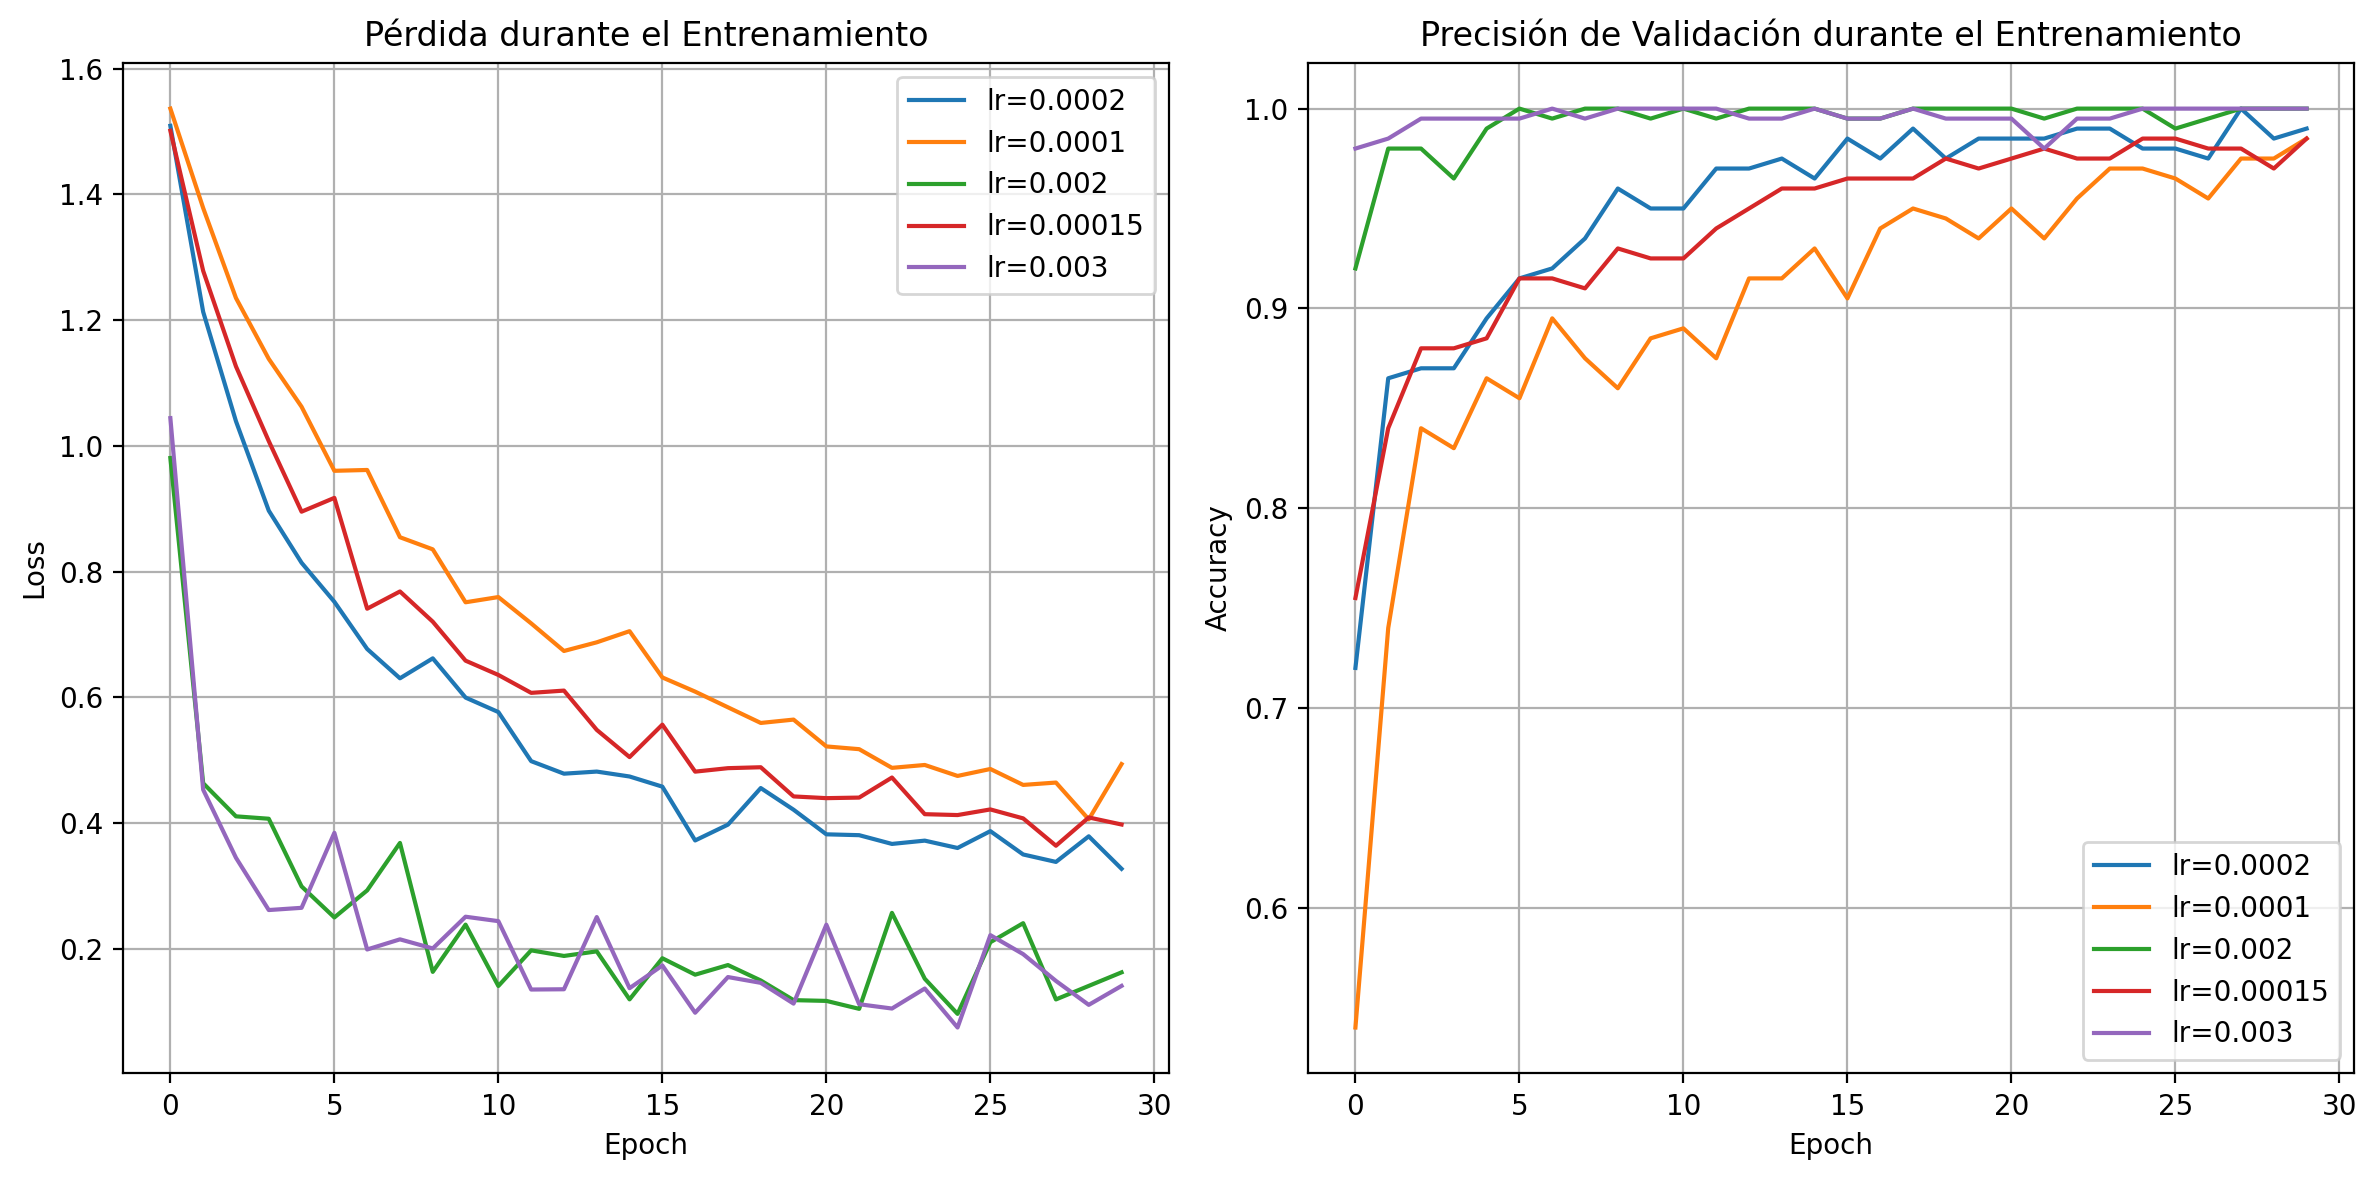

In [18]:
import matplotlib.pyplot as plt

# Visualización
fig = plt.figure(dpi=200, figsize=(12, 6))

# Gráfico de pérdida
ax1 = plt.subplot(121)
for i in range(len(lrs)):
    ax1.plot(hists[i]['loss'], label=f'lr={lrs[i]}')
ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Pérdida durante el Entrenamiento')

# Gráfico de precisión de validación
ax2 = plt.subplot(122)
for i in range(len(lrs)):
    ax2.plot(hists[i]['val_acc'], label=f'lr={lrs[i]}')
ax2.legend()
ax2.grid(True)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_title('Precisión de Validación durante el Entrenamiento')

plt.tight_layout()
plt.show()